Here we have some simple code examples to plot air pollutant concentration data downloaded from the OpenAQ website (using the API).

Code was written by Dr Ben Silver, University of Leeds.

Import packages and set directory:

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

data_path = './example_data/OpenAQ_Ghana/'

Load OpenAQ PM2.5 data and station metadata:

In [2]:
def load_ghana_data():

    fpaths = glob(data_path+'downloaded_data/station_*.csv')

    srs = []
    for fpath in fpaths:
        sr = pd.read_csv(fpath, index_col=0).squeeze()

        # skip stations where length is zero
        if len(sr) == 0:
            continue

        # convert index back to datetime
        sr.index = pd.to_datetime(sr.index)
        # messed this bit up and couldnt be bother to redownload
        sr.name = fpath.split('/')[-1][8:-4]
        srs.append(sr)

    df = pd.concat(srs, axis=1)
    df = df.sort_index()
    return df


df = load_ghana_data()

metadata = pd.read_csv(data_path+'Ghana_stations_list.csv',
                       index_col='id')

"Clean" data; remove suspicious concentrations:

In [3]:
# -999 seems to be a bad data flag. replace with nan
df = df.where(df!=-999)

print(f'{((df < 0).sum().sum() / df.size) * 100:.2f}% of the data is negative')
# replace with nan
df = df.where(df > 0)

# two of the stations have means > 1000 ug/m3, remove these
df = df.loc[:, df.mean() < 1000]

0.00% of the data is negative


Plot daily mean of all data:

<Axes: >

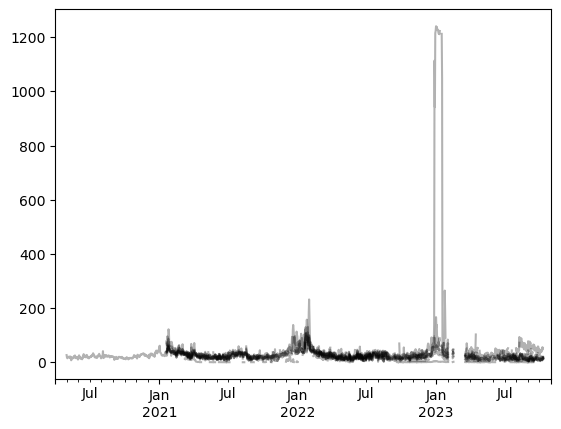

In [4]:
df.resample('D').mean().plot(alpha=.3, color='black',
                             legend=None)

Plot station data availability:

Text(0.5, 1.0, 'Proportion of stations with over 100 hourly observations in month')

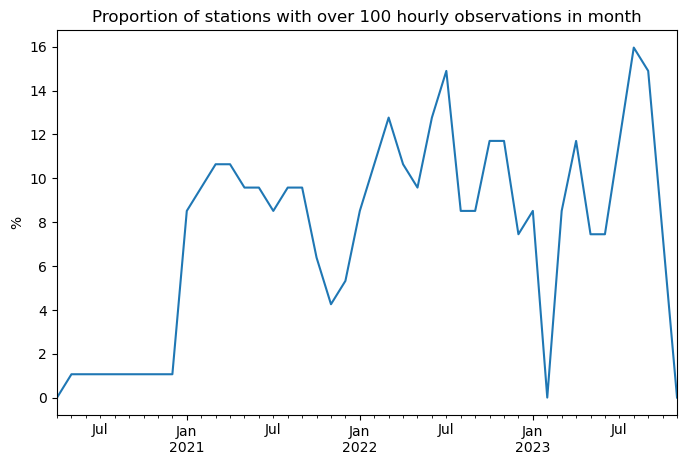

In [5]:
fig, ax = plt.subplots(figsize=[8,5])
pct_avail = (df.notnull().resample('M').sum()  > 100).sum(1) / len(df.columns) * 100
pct_avail.plot(ax=ax)
ax.set_ylabel('%')
ax.set_title('Proportion of stations with over 100 hourly observations in month')

Plot monthly mean PM2.5 concentration (seasonal cycle):

Text(0.5, 0, 'month')

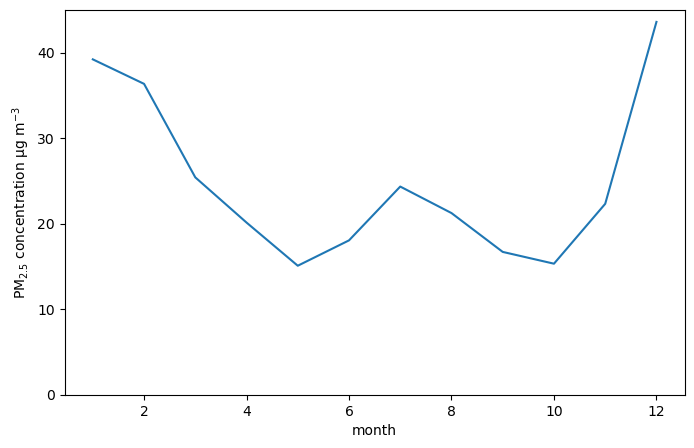

In [6]:
fig, ax = plt.subplots(figsize=[8,5])
df.groupby(df.index.month).mean().mean(1).plot(ax=ax)
ax.set_ylabel('PM$_{2.5}$ concentration µg m$^{-3}$')
ax.set_ylim(0)
ax.set_xlabel('month')

Plot hourly mean PM2.5 concentration (diurnal cycle):

Text(0.5, 0, 'hour of day')

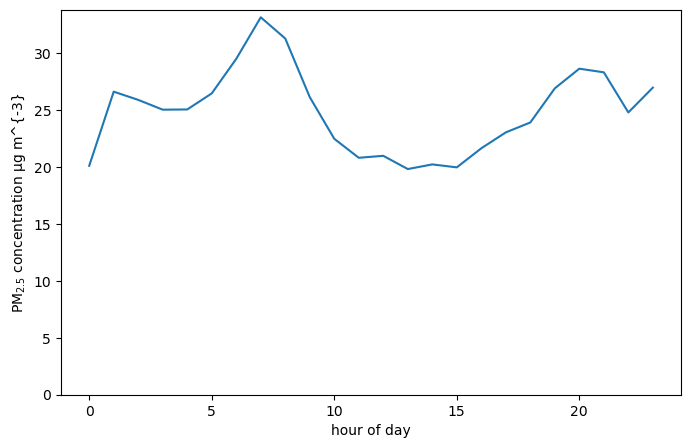

In [7]:
fig, ax = plt.subplots(figsize=[8,5])
df.groupby(df.index.hour).mean().mean(1).plot(ax=ax)
ax.set_ylabel('PM$_{2.5}$ concentration µg m^{-3}')
ax.set_ylim(0)
ax.set_xlabel('hour of day')